In [29]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
url = 'S02-hw-dataset.csv' 
data = pd.read_csv(url, sep=',') # загрузка датасета
data


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [31]:
data.head(5) # вывод первых 5 строк

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [32]:
data.info() # информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [33]:
data.describe() # описательная статистика датасета  

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [34]:
data.isna().mean() # доля пропусков в столбцах


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [35]:
# вывод всех дубликатов
find_duplicates = data.duplicated() 
duplicates = data[find_duplicates]
duplicates


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [36]:
# поиск подозрительных случаев
data.loc[(data['age'] > 100) | (data['purchases'] < 0) | (data['revenue'] <= 0) & (data['purchases'] != 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0


В таблице присутсутствую некоторые проблемы - есть 1 строка, где возраст = 120 > 100 с отрицательным количеством покупок, еще 1 строка где доход = 0 при ненулевом количестве покупок. Есть пропуски в столбце с возрастом и 1 строка, которая дублируется.

In [37]:
# частота категориальной переменной country
data.value_counts('country')


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [38]:
group = data.groupby('country') # группировка по параметру country
group['age'].mean() # среднее значения параметра age по группировке стран


country
CN    24.000000
DE    34.600000
FR    46.250000
RU    30.076923
US    36.714286
Name: age, dtype: float64

In [39]:
# разбиваем revenue на 4 заданных интервала
cuted=pd.cut(data['revenue'], 4,labels=['Low','Medium','High','Very High'], include_lowest=True)
cuted

0        Medium
1        Medium
2           Low
3        Medium
4          High
5        Medium
6           Low
7           Low
8        Medium
9           Low
10          Low
11         High
12       Medium
13    Very High
14       Medium
15          Low
16         High
17          Low
18          Low
19          Low
20         High
21          Low
22       Medium
23    Very High
24       Medium
25          Low
26         High
27       Medium
28         High
29       Medium
30          Low
31       Medium
32          Low
33          Low
34          Low
35          Low
36       Medium
37       Medium
38       Medium
39    Very High
40          Low
Name: revenue, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

При группировке по странам доминируют Россия(13) и Франция(12). 
При нахождении среднего значения возраста по группам выделяется Франция, которая имеет самый высокий средний возраст 46.25 и отличается от предыдущего почти на 9.535714.

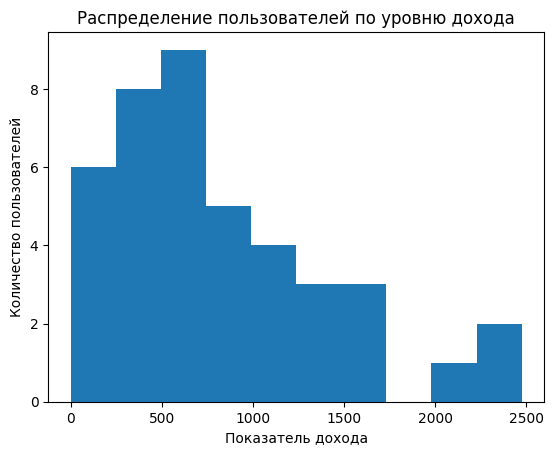

In [43]:
plt.hist(data['revenue'])
plt.xlabel("Показатель дохода")
plt.ylabel("Количество пользователей")
plt.title("Распределение пользователей по уровню дохода")
plt.savefig('figures/histogram')

Text(0.5, 1.0, 'Распределение пользовательских метрик')

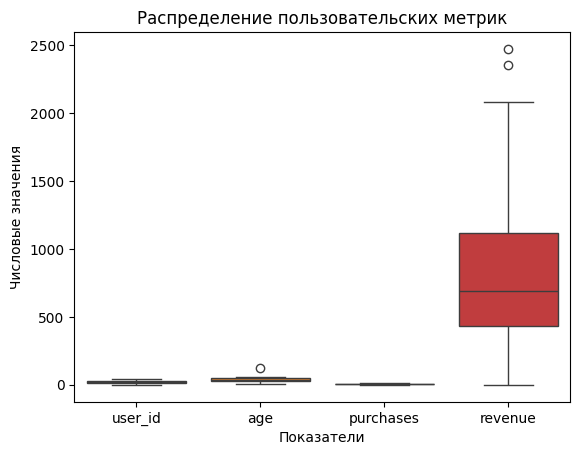

In [41]:
sns.boxplot(data)
plt.xlabel("Показатели")
plt.ylabel("Числовые значения")
plt.title("Распределение пользовательских метрик")

Text(0.5, 1.0, 'Распределение возрастов по странам')

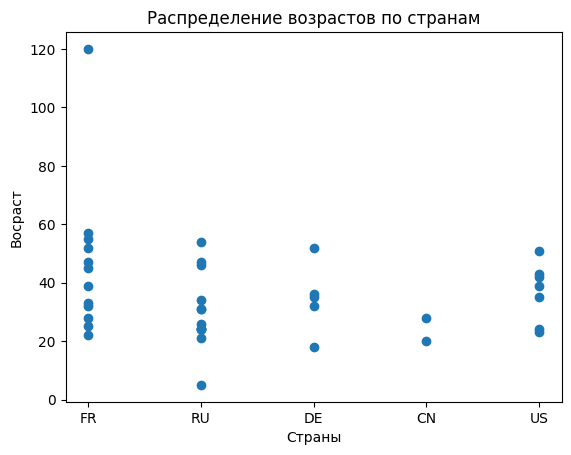

In [42]:
#
plt.scatter(data['country'], data['age'])
plt.xlabel("Страны")
plt.ylabel("Восраст")
plt.title("Распределение возрастов по странам")